In [2]:
import pandas as pd
import numpy as np
import re
import requests

# 1. GATHERING DATA

In this analysis I need to gather the information from 3 different sources: 
- The twitter file (twitter-archive-enhanced.csv)
- The image prediction file (image-predictions.tsv)
- The twitter API to get the likes and retweet from the tweet (tweet_json.txt)

### Twitter File
This file was ready to download to my pc and upload to the workspace, so that's exactly what I did in this part.

In [5]:
#Accesing the twitter_archive_enhanced file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Image Predictions File
This file needs to be download programmatically because the only thing I've got was the URL, so I downloaded and read it as a tsv file.

In [3]:
#Getting the image-predictions.tsv file from a specified url
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(url.split('/')[-1], mode='wb') as fd:
    fd.write(r.content)

In [8]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API
In this part, I need to access the twitter API in order to get the information from the tweets ids that I've already have from the twitter-archive-enhanced.csv file. To gather all this information I need to use the tweepy library.

In [6]:
import tweepy
import json
import time

consumer_key = 'ESt4CkuCOPb8diSZy1k5vIIPT' #Retirar esto antes de enviarlo
consumer_secret = 'DsKUmWBLVSq01DLXy17uHp723vM9gUqSq39MXdjsWbjXC1HGs4' #Retirar esto antes de enviarlo
access_token = '856563969296916480-QI5qdUBMbAZqLr2jP3vaPlgjJkl69Vr' #Retirar esto antes de enviarlo
access_secret = 'xnkY1cR9Mv400UNMtnx9qsrSFy4IUcPb2FZYhMOhnBeK5' #Retirar esto antes de enviarlo

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

id_errors = {}
id_errors['tweets_errors'] = []
data = {}
data['twitter_api'] = []

for tweet in twitter_archive.tweet_id:
    try:
        tweet_info = api.get_status(tweet, tweet_mode='extended')  
        data['twitter_api'].append({
            'id': tweet_info.id,
            'retweet_count': tweet_info.retweet_count,
            'favorite_count': tweet_info.favorite_count
            })
        with open('tweet_json.txt', 'w') as outfile:
            json.dump(data, outfile)
            
    except Exception as e:# catch *all* exceptions in a new file
        id_errors['tweets_errors'].append({
            'id': tweet_info.id,
            })
        with open('exception_json.txt', 'w') as outfile:
            json.dump(id_errors, outfile)    

In [3]:
import json

df_list = []

with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
for tweet in data['twitter_api']:
    
    df_list.append({'tweet_id': tweet['id'],
                    'retweet_count': tweet['retweet_count'],
                    'favorite_count': tweet['favorite_count']})
df_twitterApi = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
    

df_twitterApi

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8380,38257
1,892177421306343426,6188,32800
2,891815181378084864,4093,24693
3,891689557279858688,8522,41578
4,891327558926688256,9230,39760
5,891087950875897856,3070,19957
6,890971913173991426,2038,11681
7,890729181411237888,18611,64573
8,890609185150312448,4213,27428
9,890240255349198849,7278,31486


***

# 2. ASSESSING DATA

Now that I had all the 3 sources of information as DataFrames, I can assess the data in order to find the data quality issues and lack of tidiness.

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#View of the information from the twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#View descriptive statistics of twitter_archive DataFrame
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#View of the retweets that are still in the dataframe
twitter_archive[pd.notnull(twitter_archive.retweeted_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [12]:
#Amount of retweets that are still on the dataframe
len(twitter_archive[pd.notnull(twitter_archive.retweeted_status_id)])

181

In [13]:
twitter_archive[pd.notnull(twitter_archive.in_reply_to_status_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [14]:
#Theres no tweet_id duplicated which means theres no duplicated tweets
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
#View of the values that the numeratos has
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
#with value_counts() I can see that even thought most of the cases the 10 is the denominatos theres a few escenarios that
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
#View from the names of the dogs sorted from a -z
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [18]:
#View of the image_prediction dataframe
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
#View of the information from the image_prediction dataframe
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
#View descriptive statistics of image_prediction dataframe
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
#View of the df_twitterApi dataframe
df_twitterApi

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8380,38257
1,892177421306343426,6188,32800
2,891815181378084864,4093,24693
3,891689557279858688,8522,41578
4,891327558926688256,9230,39760
5,891087950875897856,3070,19957
6,890971913173991426,2038,11681
7,890729181411237888,18611,64573
8,890609185150312448,4213,27428
9,890240255349198849,7278,31486


In [22]:
#View descriptive statistics of fd_twitterApi dataframe
df_twitterApi.describe()

,tweet_id,retweet_count,favorite_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,2954.638343,8005.748079
std,6.832408e+16,4962.698389,12368.965713
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,593.500000,1384.500000
50%,7.186224e+17,1380.000000,3487.000000
75%,7.986971e+17,3447.750000,9816.000000
max,8.924206e+17,84242.000000,165041.000000


In [4]:
df_twitterApi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


***

## Quality Issues

#### Twitter-archive
- There are retweets in the dataset
- Wrongly extracted rating components (numerator and denominator)
- Wrongly extracted the name of the dog
- The timestamp should be in date format and dog_stage should be categorical, plus side tweet_id, in_reply_to_status_id, and in_reply_to_status_id should be strings.
- In some cases, the dog stage is missing
- Tweets with no images
- The 'text' column is show contracted

#### Image-predictions
- The dog's breeds are merge by a _ in the cases of compound names
- In the case of the dog breeds, some of them are in lower cases 
 

## Tidiness Issues
- Each dog stage is a column in the twitter_archive table
- We can easily merge df_twitterApi and image_prediction with twitter_archive in order to get one master table


# 3. CLEANING DATA

After assessing the data, I found different quality and tidiness issues that I'll be cleaning in this part.

In [23]:
image_prediction_clean = image_prediction.copy()
twitter_archive_clean = twitter_archive.copy()
df_twitterApi_clean = df_twitterApi.copy()

#### *Define*
Each dog stage is a column in the twitter_archive table, there's should be 1 column with the title dog_stage and all the 4 stages should be there.

#### *Code*

In [24]:
#This creates the dog_stage variable which is formed by extracting the dog stage variables from the text in the cases they 
# were multiple values in only takes one of them
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

#Dropping the colums that we no longer need
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#### *Test*

In [25]:
twitter_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1810,676821958043033607,NaN,NaN,2015-12-15 17:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676821958...,11,10,None,NaN
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,NaN
872,761371037149827077,NaN,NaN,2016-08-05 01:19:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Oh. My. God. 13/10 magical af h...,7.116948e+17,4.196984e+09,2016-03-20 23:23:54 +0000,https://twitter.com/dog_rates/status/711694788...,13,10,None,NaN


#### *Define*
Merge df_twitterApi and image_prediction with twitter_archive

#### *Code*

In [26]:
twitter_archive_clean = pd.merge(twitter_archive_clean, df_twitterApi_clean,
                            on='tweet_id', how='inner')
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                            on='tweet_id', how='inner')

#### *Test*

In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 0 to 2067
Data columns (total 27 columns):
tweet_id                      2068 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2068 non-null object
source                        2068 non-null object
text                          2068 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2068 non-null object
rating_numerator              2068 non-null int64
rating_denominator            2068 non-null int64
name                          2068 non-null object
dog_stage                     338 non-null object
retweet_count                 2068 non-null int64
favorite_count                2068 non-null int64
jpg_url                       2068 non-null object
img_num                       2068 non

#### *Define*
Remove the retweets from the twitter_archive dataframe

#### *Code*

In [28]:
# Select rows where 'retweeted_status_id' is null
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### *Test*

In [29]:
#We can see that theres no longer data in the retweeted_status_id, retweeted_status_user_id or retweeted_status_timestamp
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 27 columns):
tweet_id                      1993 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1993 non-null object
source                        1993 non-null object
text                          1993 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1993 non-null object
rating_numerator              1993 non-null int64
rating_denominator            1993 non-null int64
name                          1993 non-null object
dog_stage                     326 non-null object
retweet_count                 1993 non-null int64
favorite_count                1993 non-null int64
jpg_url                       1993 non-null object
img_num                       1993 non-nu

#### *Define*
Remothe the retweet columns( retweeted_status_id, retweeted_status_user_id or retweeted_status_timestamp)

#### *Code*

In [30]:
#Drop the columns that we no longer need
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#### *Test*

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                326 non-null object
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993

#### *Define*
Extract correctly the rating components (numerator and denominator)

#### *Code*

In [32]:
#Rows with more than one #/# in the text column
twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,None,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
820,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
871,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
962,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
996,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1012,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1134,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1224,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,4,10,None,...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1229,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1264,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5,10,None,...,1,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True


In [33]:
#This fix the rows with more than one #/# and save the correct value
df_tofix =[]
for value in twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text:
    df_tofix.append(value)
df_tofix

for entry in df_tofix:
    tweet = twitter_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    twitter_archive_clean.loc[tweet, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    twitter_archive_clean.loc[tweet, column_name2] = 10 #All of the denominators are 10 so I'll add it manually

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
# Change datatype of rating_numerator and denominator to float
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('float')

#### *Test*

In [35]:
twitter_archive_clean[twitter_archive_clean.text.isin(df_tofix)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
611,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,11.0,10.0,None,...,1,cocker_spaniel,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True
820,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,7.0,10.0,Bookstore,...,1,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True
871,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.0,10.0,None,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
962,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.0,10.0,None,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
996,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11.0,10.0,Bluebert,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1012,714258258790387713,NaN,NaN,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,8.0,10.0,Travis,...,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
1134,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2.0,10.0,Socks,...,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
1224,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13.0,10.0,None,...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False
1229,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5.0,10.0,Oliviér,...,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
1264,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10.0,10.0,None,...,1,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True


#### *Define*
Fix the name of the dogs

#### *Code*

In [36]:
#We have 3 scenarios that I can fix
#The first one is when the name is in lowercase and the text contains the word "named"
named_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('named'))]
named_to_replace_list = named_to_replace['text'].tolist()

named_is_to_replace = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('name is'))]
named_is_to_replace_list = named_is_to_replace['text'].tolist()

no_name_to_replace = twitter_archive_clean.loc[twitter_archive_clean['name'].str.islower()]
no_name_to_replace_list = no_name_to_replace['text'].tolist()

for entry in named_to_replace_list:
    tweet = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[tweet, name_column] = re.findall(r"named\s(\w+)", entry)
    
for entry in named_is_to_replace_list:
    tweet = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[tweet, name_column] = re.findall(r"name is\s(\w+)", entry)
    
for entry in no_name_to_replace_list:
    tweet = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[tweet, name_column] = 'None'

#### *Test*

In [37]:
twitter_archive_clean.name.sort_values()

831             Abby
842             Abby
763              Ace
1651            Acro
1104           Adele
1652           Aiden
66               Aja
379            Akumi
659               Al
707           Albert
1671          Albert
324            Albus
119            Albus
914          Aldrick
1762       Alejandro
294        Alexander
986     Alexanderson
384              Alf
1359           Alfie
691            Alfie
1951           Alfie
287            Alfie
46              Alfy
1436           Alice
159            Alice
1254           Amber
1111         Ambrose
1794             Amy
1909          Amélie
624           Anakin
            ...     
754           Winnie
209           Winnie
320          Winston
1031         Winston
803          Winston
656          Winston
1553         Winston
222          Winston
448          Winston
1849         Winston
709           Wishes
143            Wyatt
322            Wyatt
1216           Wyatt
1150            Yoda
38              Yogi
492          

#### *Define*
Change the 'None' value from the name of dog to a Nan value

#### *Code*

In [38]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.NaN)

#### *Test*

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1349 non-null object
dog_stage                326 non-null object
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  

#### *Define*
Change datatypes of timestamp to datetime, dog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

#### *Code*

In [40]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')

#### *Test*

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2067
Data columns (total 24 columns):
tweet_id                 1993 non-null object
in_reply_to_status_id    1993 non-null object
in_reply_to_user_id      1993 non-null object
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null float64
name                     1349 non-null object
dog_stage                326 non-null category
retweet_count            1993 non-null int64
favorite_count           1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf     

#### *Define*
Drop the Tweets with no images

#### *Code*

In [42]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### *Test*

In [43]:
sum(twitter_archive_clean['expanded_urls'].isnull())

0

#### *Define*
Display the content in the 'text' column

#### *Code*

In [44]:
pd.set_option('display.max_colwidth', 0 )

#### *Test*

In [45]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,nan,nan,2017-07-27 

#### *Define*
Split the dog's breeds that are merged by a " _ " also convert the string as a title format

#### *Code*

In [46]:
#Replace de " _ " with a blank space for the p1 colum also convert the string as a title
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.replace("_" , " ")
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.title()

#Replace de " _ " with a blank space for the p12 colum also convert the string as a title
twitter_archive_clean.p2 = twitter_archive_clean.p1.str.replace("_" , " ")
twitter_archive_clean.p2 = twitter_archive_clean.p1.str.title()

#Replace de " _ " with a blank space for the p3 colum also convert the string as a title
twitter_archive_clean.p3 = twitter_archive_clean.p1.str.replace("_" , " ")
twitter_archive_clean.p3 = twitter_archive_clean.p1.str.title()


#### *Test*

In [48]:
twitter_archive_clean.p1

0       Orange                     
1       Chihuahua                  
2       Chihuahua                  
3       Paper Towel                
4       Basset                     
5       Chesapeake Bay Retriever   
6       Appenzeller                
7       Pomeranian                 
8       Irish Terrier              
9       Pembroke                   
10      Samoyed                    
11      French Bulldog             
12      Pembroke                   
13      French Bulldog             
14      Golden Retriever           
15      Whippet                    
16      Golden Retriever           
17      Golden Retriever           
18      Siberian Husky             
19      French Bulldog             
20      Basset                     
21      Limousine                  
22      Pembroke                   
23      Mexican Hairless           
24      Samoyed                    
25      Chihuahua                  
26      Kuvasz                     
27      Convertible         

# 4. STORE DATA
Now that the information has been collected, evaluated and cleaned up, it can be recorded into a master csv file

In [49]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# 5. ANALYSIS

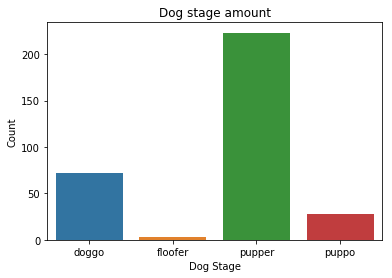

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ax = sns.countplot(x="dog_stage", data=twitter_archive_clean)
ax.set_title('Dog stage amount')
ax.set_ylabel('Count')
ax.set_xlabel('Dog Stage');

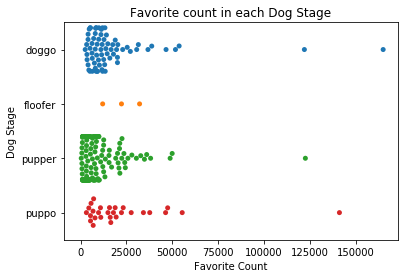

In [53]:
#This plot the dog_stage vs the favorite_count from each tweet
ax = sns.swarmplot(x="favorite_count", y="dog_stage", data=twitter_archive_clean)
ax.set_title('Favorite count in each Dog Stage')
ax.set_ylabel('Dog Stage')
ax.set_xlabel('Favorite Count');

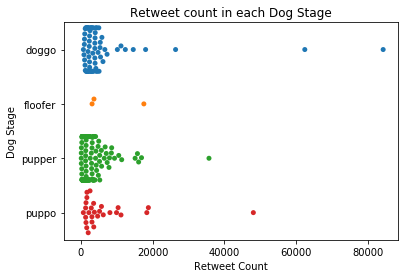

In [54]:
#This plot the dog_stage vs the retweet_count from each tweet
ax =sns.swarmplot(x="retweet_count", y="dog_stage", data=twitter_archive_clean)
ax.set_title('Retweet count in each Dog Stage')
ax.set_ylabel('Dog Stage')
ax.set_xlabel('Retweet Count');

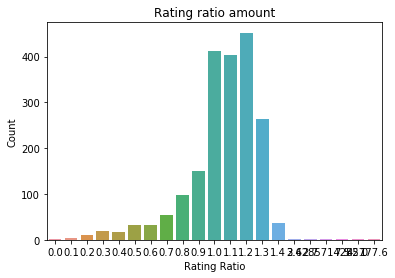

In [56]:
#I created the rating_ratio column dividing the numerator with the denominator
twitter_archive_clean['rating_ratio'] = twitter_archive_clean['rating_numerator']/twitter_archive_clean['rating_denominator']

#This plot a first sight of the rating ratio amount over this dataset
ax = sns.countplot(x="rating_ratio", data=twitter_archive_clean)
ax.set_title('Rating ratio amount')
ax.set_ylabel('Count')
ax.set_xlabel('Rating Ratio');

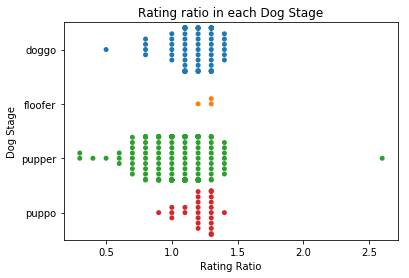

In [57]:
#This plot the dog_stage vs the rating_ratio from each tweet
ax =sns.swarmplot(x="rating_ratio", y="dog_stage", data=twitter_archive_clean)
ax.set_title('Rating ratio in each Dog Stage')
ax.set_ylabel('Dog Stage')
ax.set_xlabel('Rating Ratio');

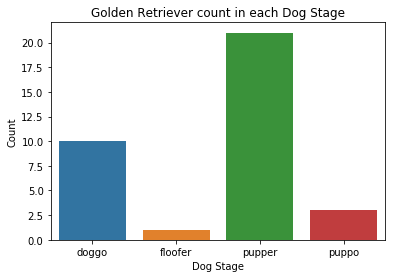

In [58]:
#The most tweeted dog breed is Golden Retriever so I wanna know wich dog stage has most tweets
tweets_golden = twitter_archive_clean[twitter_archive_clean['p1'] =='Golden Retriever']

ax = sns.countplot(x="dog_stage", data=tweets_golden)
ax.set_title('Golden Retriever count in each Dog Stage')
ax.set_xlabel('Dog Stage')
ax.set_ylabel('Count');